
    [ ] Choose your target. Which column in your tabular dataset will you predict?
    [ ] Is your problem regression or classification?
    [ ] How is your target distributed?
        Classification: How many classes? Are the classes imbalanced?
        Regression: Is the target right-skewed? If so, you may want to log transform the target.
    [ ] Choose which observations you will use to train, validate, and test your model.
        Are some observations outliers? Will you exclude them?
        Will you do a random split or a time-based split?
    [ ] Choose your evaluation metric(s).
        Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    [ ] Begin to clean and explore your data.
    [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?


In [499]:
#import libraries
import os
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce 
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()

'C:\\Users\\SKrishna\\Documents\\GitHub\\airbnb'

In [500]:
pd.set_option('display.max_columns',999)

In [ ]:
#read csv file and parse dates for three columns

In [501]:
listings = pd.read_csv('listings_1.csv', low_memory=False,parse_dates=['last_scraped', 'first_review', 'last_review', 'host_since'])

In [502]:
listings.shape

(9023, 106)

In [503]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20191121092259,2019-11-21,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, (Phone number h...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, (Phone number h...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/02973ad3-a...,NaN,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/016a1...,https://a0.muscache.com/im/pictures/user/016a1...,Minor,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.61082,-122.29082,t,House,Entire home/apt,9,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$296.00,NaN,NaN,$500.00,$250.00,8,$25.00,7,1000,7,7,1000,1000,7.0,1000.0,5 days ago,t,6,29,59,59,2019-11-21,29,9,2008-09-15,2019-10-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{WASHINGTON,"" Seattle"","" WA""}",t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.21
1,5682,https://www.airbnb.com/rooms/5682,20191121092259,2019-11-21,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,My personal favorite places to dine are: • Ma...,Bus 120 is right outside and goes into downtow...,PRIVATE ENTRANCE WITH PRIVATE BATH Queen size ...,"I'm more than happy to meet with guests, but u...",**PLEASE READ** NO SMOKING NO VAPING NO MARIJU...,NaN,NaN,https://a0.muscache.com/im/pictures/5ec89f9d-8...,NaN,8993,https://www.airbnb.com/users/show/8993,Maddy,2009-03-03,"Seattle, Washington, United States",Hello my name is Maddy. I enjoy meeting and ho...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/8993/profile_...,https://a0.muscache.com/im/users/8993/profile_...,South Delridge,1.0,1.0,"['email', 'ph

In [504]:
#since we are not planning to use most of the textual data, i've filtered out the list of columns that are useful as a list cols.

In [506]:
cols = ['id', 'host_id', 'host_since', 'host_verifications', 'host_is_superhost', 'zipcode', 'bathrooms', 'bedrooms', 
        'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 
        'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights','maximum_nights', 'calendar_updated', 
        'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
        'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating','review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
        'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 
        'require_guest_phone_verification','calculated_host_listings_count', 'reviews_per_month']

In [507]:
df = listings[cols]

In [ ]:
#checking types of data we are dealing with.

In [508]:
df.dtypes

id                                           int64
host_id                                      int64
host_since                          datetime64[ns]
host_verifications                          object
host_is_superhost                           object
zipcode                                     object
bathrooms                                  float64
bedrooms                                   float64
beds                                       float64
bed_type                                    object
amenities                                   object
square_feet                                float64
price                                       object
weekly_price                                object
monthly_price                               object
security_deposit                            object
cleaning_fee                                object
guests_included                              int64
extra_people                                object
minimum_nights                 

In [509]:
#lets see the number of null values here

In [510]:
df.isnull().sum()

id                                     0
host_id                                0
host_since                             4
host_verifications                     0
host_is_superhost                      4
zipcode                              169
bathrooms                              2
bedrooms                               7
beds                                   3
bed_type                               0
amenities                              0
square_feet                         8620
price                                  0
weekly_price                        8044
monthly_price                       8272
security_deposit                    1541
cleaning_fee                         769
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
calendar_updated                       0
has_availability                       0
availability_30                        0
availability_60 

In [511]:
# percentage of null values
temp = df.isnull().sum() / df.shape[0]
temp[temp > 0]

host_since                     0.000443
host_is_superhost              0.000443
zipcode                        0.018730
bathrooms                      0.000222
bedrooms                       0.000776
beds                           0.000332
square_feet                    0.955336
weekly_price                   0.891500
monthly_price                  0.916768
security_deposit               0.170786
cleaning_fee                   0.085227
first_review                   0.139754
last_review                    0.139754
review_scores_rating           0.146293
review_scores_accuracy         0.146514
review_scores_cleanliness      0.146514
review_scores_checkin          0.146625
review_scores_communication    0.146404
review_scores_location         0.146625
review_scores_value            0.146514
reviews_per_month              0.139754
dtype: float64

In [512]:
#drop these columns because initial model showed very little dependence based on rev1 of this analysis.
df = df.drop(columns=['weekly_price','monthly_price','square_feet'])

In [513]:
df.head(2)

,id,host_id,host_since,host_verifications,host_is_superhost,zipcode,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2318,2536,2008-08-26,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,98122,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",$296.00,$500.00,$250.00,8,$25.00,7,1000,5 days ago,t,6,29,59,59,29,2008-09-15,2019-10-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,2,0.21
1,5682,8993,2009-03-03,"['email', 'phone', 'manual_online', 'reviews',...",f,98106,1.0,0.0,1.0,Real Bed,"{TV,Internet,Wifi,""Free street parking"",Heatin...",$48.00,$120.00,$45.00,1,$5.00,3,14,8 months ago,t,0,0,0,0,462,2010-03-21,2018-11-24,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,f,t,1,3.92


In [514]:
df.dtypes

id                                           int64
host_id                                      int64
host_since                          datetime64[ns]
host_verifications                          object
host_is_superhost                           object
zipcode                                     object
bathrooms                                  float64
bedrooms                                   float64
beds                                       float64
bed_type                                    object
amenities                                   object
price                                       object
security_deposit                            object
cleaning_fee                                object
guests_included                              int64
extra_people                                object
minimum_nights                               int64
maximum_nights                               int64
calendar_updated                            object
has_availability               

In [515]:
#data cleaning

In [516]:
def wrangle(X):
    X = X.copy()
    X['price'] = X['price'].str.replace('$','')
    X['price'] = X['price'].str.replace(',','')
    X['security_deposit'] = X['security_deposit'].str.replace('$','')
    X['security_deposit'] = X['security_deposit'].str.replace(',','')
    X['cleaning_fee'] = X['cleaning_fee'].str.replace('$','')
    X['cleaning_fee'] = X['cleaning_fee'].str.replace(',','')
    X['extra_people'] = X['extra_people'].str.replace('$','')
    X['extra_people'] = X['extra_people'].str.replace(',','')
    X['security_deposit'] = X['security_deposit'].astype('float')
    X['cleaning_fee'] = X['cleaning_fee'].astype('float')  
    X['price'] = X['price'].astype('float')
    X['extra_people'] = X['extra_people'].astype('float')
    X['host_is_superhost'] = X['host_is_superhost'].astype('str')
    X['has_availability'] = X['has_availability'].astype('str')
    X['instant_bookable'] = X['instant_bookable'].astype('str')
    X['require_guest_profile_picture'] = X['require_guest_profile_picture'].astype('str')
    X['require_guest_phone_verification'] = X['require_guest_phone_verification'].astype('str')
    X['zipcode'] = df['zipcode'].str.extract(r'(\d+)(?<![^0-9])')
    X['zipcode'] = X['zipcode'].astype('float')
    X['zipcode'] = X['zipcode'].dropna()
    X['bedrooms'] = X['bedrooms'].astype('float')
    X['host_is_superhost'] = X['host_is_superhost'].str.replace('t','1')
    X['host_is_superhost'] = X['host_is_superhost'].str.replace('f','0')
    X['host_is_superhost'] = X['host_is_superhost'].astype('float')
    X['has_availability'] = X['has_availability'].str.replace('t','1')
    X['has_availability'] = X['has_availability'].str.replace('f','0')
    X['instant_bookable'] = X['instant_bookable'].str.replace('t','1')
    X['instant_bookable'] = X['instant_bookable'].str.replace('f','0')
    X['require_guest_profile_picture'] = X['require_guest_profile_picture'].str.replace('t','1')
    X['require_guest_profile_picture'] = X['require_guest_profile_picture'].str.replace('f','0')
    X['require_guest_phone_verification'] = X['require_guest_phone_verification'].str.replace('t','1')
    X['require_guest_phone_verification'] = X['require_guest_phone_verification'].str.replace('f','0')
    
    X_now = X['host_since'].max()
    X['host_days'] = X.host_since.map(lambda x: (X_now - x).days)
    X_now_first_review = X['first_review'].max()
    X['first_review_days'] = X.first_review.map(lambda x: (X_now_first_review - x).days)
    X_now_last_review = X['last_review'].max()
    X['last_review_days'] = X.last_review.map(lambda x: (X_now_last_review - x).days)
    X = X.drop(columns=['host_since','first_review','last_review'])
    X = X.drop(columns = ['calendar_updated'])
    
    return X

In [517]:
df = wrangle(df)

In [518]:
df.isnull().sum() / df.shape[0] #percentage of null values.

id                                  0.000000
host_id                             0.000000
host_verifications                  0.000000
host_is_superhost                   0.000443
zipcode                             0.018841
bathrooms                           0.000222
bedrooms                            0.000776
beds                                0.000332
bed_type                            0.000000
amenities                           0.000000
price                               0.000000
security_deposit                    0.170786
cleaning_fee                        0.085227
guests_included                     0.000000
extra_people                        0.000000
minimum_nights                      0.000000
maximum_nights                      0.000000
has_availability                    0.000000
availability_30                     0.000000
availability_60                     0.000000
availability_90                     0.000000
availability_365                    0.000000
number_of_

In [519]:
#host_verifications wrangling

df.host_verifications = df.host_verifications.replace(['[]', 'None'], "['none']")

### define categorical dummy dataframe
cat = pd.get_dummies(df.host_verifications.map(literal_eval).apply(pd.Series).stack(), prefix='host_ver').sum(level=0)

## drop host_verifications from df
df = df.drop(columns=['host_verifications'])

## drop amenities
df = df.drop(columns=['amenities'])

#removing due to high cardinality.
df = df.drop(columns=['host_id','id'])

In [520]:

#imputing for columns that have 0  / Nan  / missing values
imp_mode = SimpleImputer(strategy='most_frequent')
df[['host_is_superhost', 
    'zipcode', 
    'host_days',
    'reviews_per_month',
    'first_review_days',
    'last_review_days',
    'security_deposit',
    'cleaning_fee']] = imp_mode.fit_transform(df[['host_is_superhost', 
                                                  'zipcode', 
                                                  'host_days',
                                                  'reviews_per_month',
                                                  'first_review_days',
                                                  'last_review_days',
                                                  'security_deposit',
                                                  'cleaning_fee']])


imp_mean = SimpleImputer(strategy='mean')
df[['bathrooms', 
    'bedrooms', 
    'beds',
    'review_scores_rating',
    'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']] = imp_mode.fit_transform(df[['bathrooms', 
    'bedrooms', 
    'beds',
    'review_scores_rating',
    'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']])

#one-hot encoding. for some reason this is not being done properly in the pipeline.
encoder = ce.OneHotEncoder(use_cat_names=True)
df = encoder.fit_transform(df)



In [521]:
df = df.drop(columns=['zipcode'])

In [522]:
df.head()

,host_is_superhost,bathrooms,bedrooms,beds,bed_type_Real Bed,bed_type_Futon,bed_type_Couch,bed_type_Pull-out Sofa,bed_type_Airbed,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability_1,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable_1,instant_bookable_0,cancellation_policy_strict_14_with_grace_period,cancellation_policy_moderate,cancellation_policy_flexible,cancellation_policy_super_strict_60,cancellation_policy_super_strict_30,cancellation_policy_strict,require_guest_profile_picture_0,require_guest_profile_picture_1,require_guest_phone_verification_0,require_guest_phone_verification_1,calculated_host_listings_count,reviews_per_month,host_days,first_review_days,last_review_days
0,1.0,2.5,4.0,4.0,1,0,0,0,0,296.0,500.0,250.0,8,25.0,7,1000,1,6,29,59,59,29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,1,0,0,0,0,0,1,0,1,0,2,0.21,4103.0,4082.0,21.0
1,0.0,1.0,0.0,1.0,1,0,0,0,0,48.0,120.0,45.0,1,5.0,3,14,1,0,0,0,0,462,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,1,1,0,0,0,0,0,1,0,0,1,1,3.92,3914.0,3530.0,362.0
2,0.0,1.0,1.0,1.0,1,0,0,0,0,90.0,200.0,40.0,2,10.0,2,1125,1,0,19,49,49,150,92.0,9.0,9.0,10.0,10.0,10.0,9.0,0,1,1,0,0,0,0,0,1,0,1,0,3,1.19,3860.0,3777.0,54.0
3,1.0,3.0,1.0,1.0,1,0,0,0,0,62.0,100.0,10.0,1,15.0,2,60,1,29,54,84,359,146,93.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,0,0,0,0,0,1,0,1,8,1.29,3755.0,3399.0,30.0
4,1.0,1.0,1.0,1.0,1,0,0,0,0,99.0,0.0,45.0,1,15.0,3,29,1,11,34,56,138,455,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,1,0,0,0,0,1,0,1,0,4,3.65,3754.0,3732.0,12.0


In [523]:
df['calculated_host_listings_count'].value_counts(normalize=True)

1      0.470354
2      0.129669
3      0.063837
346    0.038346
237    0.026266
4      0.025712
5      0.020503
6      0.017289
152    0.016846
138    0.015294
8      0.015073
117    0.012967
58     0.012856
7      0.012413
92     0.010196
91     0.010085
9      0.007980
10     0.007758
29     0.006428
52     0.005763
13     0.005763
50     0.005541
25     0.005541
12     0.005320
48     0.005320
46     0.005098
22     0.004876
41     0.004544
40     0.004433
39     0.004322
36     0.003990
17     0.003768
11     0.003657
16     0.003546
15     0.003325
14     0.003103
20     0.002217
Name: calculated_host_listings_count, dtype: float64

In [ ]:
#removing outliers in number of listings a host has and limiting only ones that have a max. of 50 listings.

In [524]:
df = df[df['calculated_host_listings_count'] <= 50]

In [525]:
df['calculated_host_listings_count'].value_counts(normalize=True)

1     0.552460
2     0.152304
3     0.074980
4     0.030200
5     0.024082
6     0.020307
8     0.017704
7     0.014580
9     0.009373
10    0.009112
29    0.007550
13    0.006769
25    0.006509
50    0.006509
48    0.006248
12    0.006248
46    0.005988
22    0.005728
41    0.005337
40    0.005207
39    0.005077
36    0.004686
17    0.004426
11    0.004296
16    0.004166
15    0.003905
14    0.003645
20    0.002603
Name: calculated_host_listings_count, dtype: float64

In [ ]:
#checking log price transform 

In [526]:
y = df['price']

In [527]:
y.describe()

count    7682.000000
mean      144.527727
std       186.628975
min         0.000000
25%        77.000000
50%       110.000000
75%       170.000000
max      9999.000000
Name: price, dtype: float64

In [528]:
y.value_counts()

100.0    300
150.0    297
125.0    229
75.0     228
99.0     204
        ... 
348.0      1
508.0      1
151.0      1
193.0      1
296.0      1
Name: price, Length: 394, dtype: int64

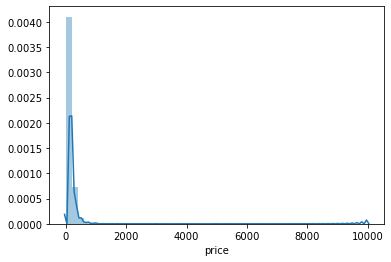

In [529]:
sns.distplot(y)

In [530]:
y.describe()

count    7682.000000
mean      144.527727
std       186.628975
min         0.000000
25%        77.000000
50%       110.000000
75%       170.000000
max      9999.000000
Name: price, dtype: float64

In [531]:
#zeros in price

In [532]:
(y == 0).count()

7682

In [533]:
import numpy as np
y_log = np.log1p(y)

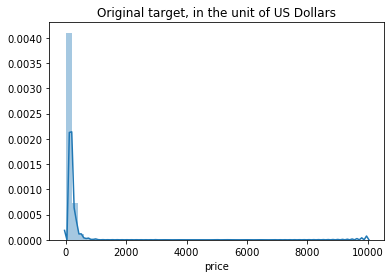

In [534]:
import matplotlib.pyplot as plt
sns.distplot(y)
plt.title('Original target, in the unit of US Dollars');

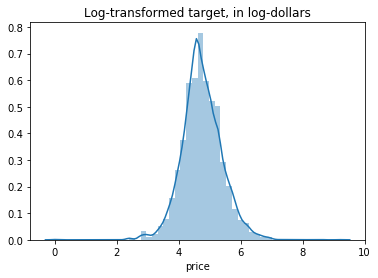

In [535]:
sns.distplot(y_log)
plt.title('Log-transformed target, in log-dollars');

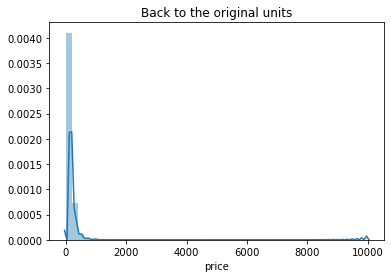

In [536]:
y_untransformed = np.expm1(y_log)
sns.distplot(y_untransformed)
plt.title('Back to the original units');

In [537]:
#convert to log and use for modeling. and then convert back as exponentials.

In [538]:
#convert the ones lower than $10.

In [ ]:
#split df into train test split.

In [539]:
train,test = train_test_split(df, test_size=0.25, random_state=42)

In [540]:
train,val = train_test_split(train, test_size=0.25, random_state=42)

In [541]:
target = 'price'
features = train.columns.drop([target])

In [542]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [543]:
train.shape,val.shape,test.shape

((4320, 46), (1441, 46), (1921, 46))

In [544]:
X_train.head()

,host_is_superhost,bathrooms,bedrooms,beds,bed_type_Real Bed,bed_type_Futon,bed_type_Couch,bed_type_Pull-out Sofa,bed_type_Airbed,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability_1,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable_1,instant_bookable_0,cancellation_policy_strict_14_with_grace_period,cancellation_policy_moderate,cancellation_policy_flexible,cancellation_policy_super_strict_60,cancellation_policy_super_strict_30,cancellation_policy_strict,require_guest_profile_picture_0,require_guest_profile_picture_1,require_guest_phone_verification_0,require_guest_phone_verification_1,calculated_host_listings_count,reviews_per_month,host_days,first_review_days,last_review_days
2214,0.0,1.0,1.0,1.0,1,0,0,0,0,0.0,50.0,1,0.0,2,1125,1,0,0,0,0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,0,1,0,0,0,1,0,1,0,1,0.02,1868.0,1267.0,1269.0
2633,0.0,1.0,1.0,1.0,1,0,0,0,0,350.0,50.0,1,0.0,2,14,1,0,0,0,0,15,99.0,10.0,10.0,10.0,10.0,10.0,9.0,0,1,1,0,0,0,0,0,1,0,1,0,1,0.43,1898.0,1052.0,816.0
8290,0.0,1.0,1.0,1.0,1,0,0,0,0,0.0,50.0,1,0.0,1,32,1,0,0,0,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,1,0,0,0,0,0,1,0,1,0,1,1.00,1468.0,442.0,4.0
6828,0.0,1.5,1.0,2.0,1,0,0,0,0,100.0,15.0,1,15.0,2,360,1,30,60,90,365,3,100.0,9.0,9.0,10.0,10.0,9.0,9.0,0,1,0,0,1,0,0,0,1,0,1,0,3,0.38,772.0,234.0,81.0
5964,1.0,1.0,0.0,2.0,1,0,0,0,0,0.0,10.0,1,0.0,1,1125,1,15,34,63,105,134,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0,1,0,0,0,0,0,1,0,1,0,13,8.61,2499.0,464.0,3.0


In [545]:
#build cross val pipeline

from sklearn.model_selection import cross_val_score


pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [50.24395564 55.1237022  50.42249306]


In [546]:
-scores.mean()

51.930050297619054

In [547]:
#fit pipeline.
pipeline.fit(X_train, y_train);

In [548]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [549]:
# check MAE value.
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Val MAE: ${mae:,.0f}')


Val MAE: $52


In [550]:
#check with baseline mean value .

In [551]:
#r2 = r2_score(y_val, y_pred)
#print("======= Result =======")
#print("R2 Score: {:.4f}".format(r2))

======= Result =======
R2 Score: -0.3649


In [552]:
#check random values with their predictions to see how far off we are.

compare_df = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
ind = np.random.choice(len(compare_df), 10, replace=False)
compare_df.iloc[ind]

,y_val,y_pred
7191,300.0,271.83
6224,140.0,117.68
6061,79.0,74.52
6225,45.0,134.89
1587,300.0,289.51
5905,50.0,65.10
2902,85.0,82.68
2626,255.0,189.29
5829,104.0,91.83
5343,325.0,244.71


In [553]:
rf = pipeline.named_steps['randomforestregressor']

In [554]:
len(rf.feature_importances_)

45

In [555]:
len(X_train.columns)

45

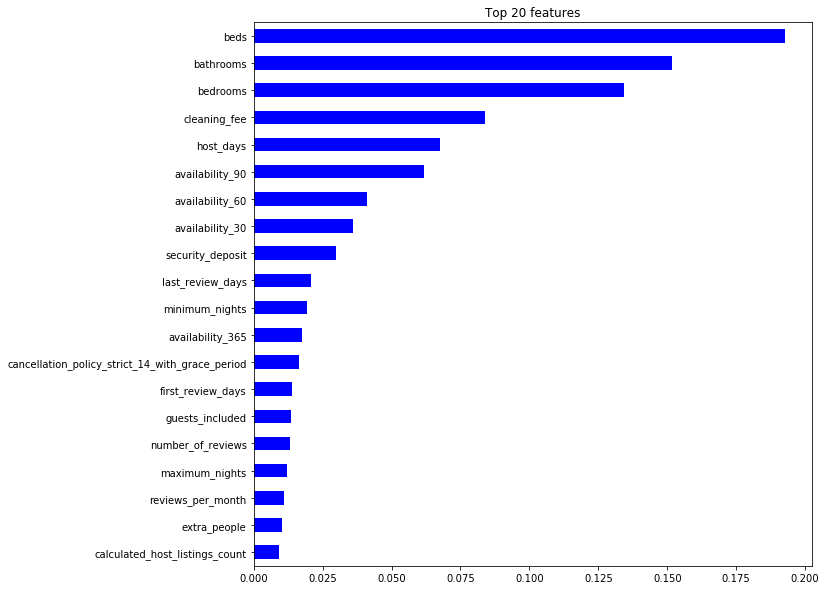

In [556]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [557]:
#single feature PDP

In [558]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

from pdpbox.pdp import pdp_isolate, pdp_plot

feature='cleaning_fee'

isolated = pdp_isolate(
    model = pipeline,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature,
    
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d99a4db4e0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d9c4e3b2b0>})

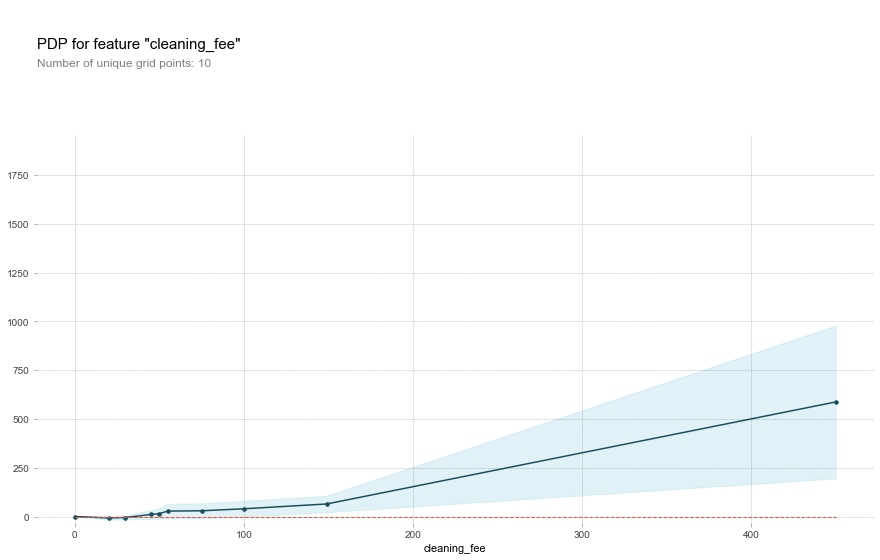

In [559]:
pdp_plot(isolated, feature_name=feature)

(0, 3)

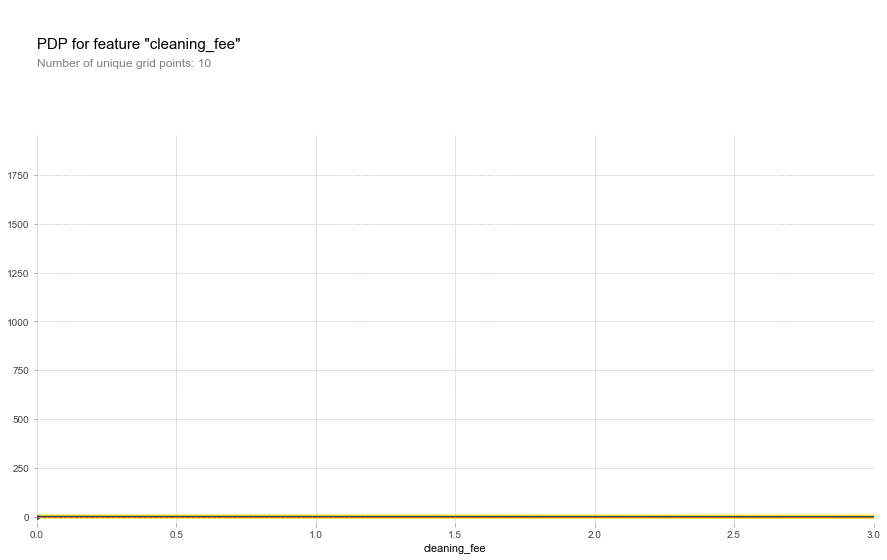

In [560]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0, 3)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d9a147b1d0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d9bd04e4e0>})

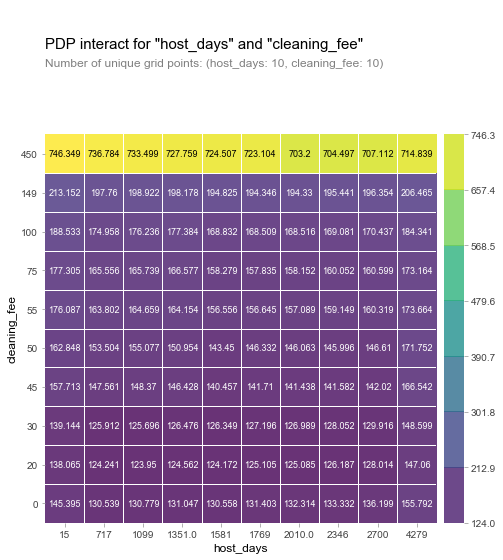

In [561]:
#pdp interaction plot between host_days and cleaning fee.
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features=['host_days','cleaning_fee']

interaction = pdp_interact(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

In [563]:
#think of the number of features hat users has to fill up for the web app.
#shap value graphs

In [564]:
import shap

In [565]:
row = X_val.iloc[[0]]
row

,host_is_superhost,bathrooms,bedrooms,beds,bed_type_Real Bed,bed_type_Futon,bed_type_Couch,bed_type_Pull-out Sofa,bed_type_Airbed,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability_1,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable_1,instant_bookable_0,cancellation_policy_strict_14_with_grace_period,cancellation_policy_moderate,cancellation_policy_flexible,cancellation_policy_super_strict_60,cancellation_policy_super_strict_30,cancellation_policy_strict,require_guest_profile_picture_0,require_guest_profile_picture_1,require_guest_phone_verification_0,require_guest_phone_verification_1,calculated_host_listings_count,reviews_per_month,host_days,first_review_days,last_review_days
1121,0.0,3.5,3.0,5.0,1,0,0,0,0,0.0,125.0,1,0.0,2,1125,1,0,0,0,0,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,0,0,0,0,1,0,1,0,1,0.04,1734.0,1559.0,1555.0


In [566]:
# Assign to train and test only four features.
features = ['bedrooms', 'bathrooms', 'cleaning_fee', 'host_days']
target = 'price'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [567]:
#best estimator search
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   24.6s remaining:   57.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   24.7s remaining:   24.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   25.0s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.7s finished


In [568]:
#model is being used because shap library can't use pipelines. somebody needs to fix that :/
model = search.best_estimator_

In [569]:
#shap value 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [570]:
shap_values

array([[-37.17942624,  16.14136633, -44.69762409, -26.16394517,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

In [572]:
#create a predction variable for app and display shap visualization.

def predict(bedrooms, bathrooms, longitude, latitude, model):

  # Make df from inputs
  df = pd.DataFrame(
      data=[[bedrooms, bathrooms, longitude, latitude]],
      columns=['bedrooms', 'bathrooms', 'cleaning_fee', 'host_days']      
  )

  # Make a prediction
  pred = model.predict(df)[0]
  
  # Calculate the shap values
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(df)

  # Print some results
  feature_names = df.columns
  feature_values = df.values[0]
  shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

  result = f'${pred:,.0f} estimated rent for this Airbnb is. \n\n'
  result += f'Starting from baseline of ${explainer.expected_value:,.0f} \n'
  result += shaps.to_string()
  print(result)

  # Show the shapley force plot
  shap.initjs()
  return shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=df
)

In [574]:
predict(3,2.5,100,500,model)

$198 estimated rent for this Airbnb is. 

Starting from baseline of $145 
(bedrooms, 3.0)          43.485944
(bathrooms, 2.5)         32.277473
(cleaning_fee, 100.0)    -8.643620
(host_days, 500.0)      -14.317124
